
## Titanic EDA — Age Analysis

This notebook focuses on detailed analysis of the Age column in the Titanic dataset, including:
- Distribution and outlier detection
- Missing value analysis
- Different imputation strategies with visualizations
- Comparison of approaches for handling Age


In [22]:
# Imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [23]:

DATA_TRAIN = '../data/train.csv'
df = pd.read_csv(DATA_TRAIN)

## 1. Age Distribution and Outlier Detection
# Summary statistics
print(df['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [24]:
# Round float values for example age = 0.42 to 1 becuase we dont have ages in decimals
df['Age'] = df['Age'].round().astype('Int64')  # Use Int64 to allow for NaN values
# it is not meaningful to have age 0
df.loc[df['Age'] == 0, 'Age'] = 1  # Set age 0 to 1

In [25]:
# describe again after rounding
print(df['Age'].describe())
# now we dont have age 0 and float values so we fixed outliers


count        714.0
mean     29.694678
std      14.521708
min            1.0
25%           20.0
50%           28.0
75%           38.0
max           80.0
Name: Age, dtype: Float64


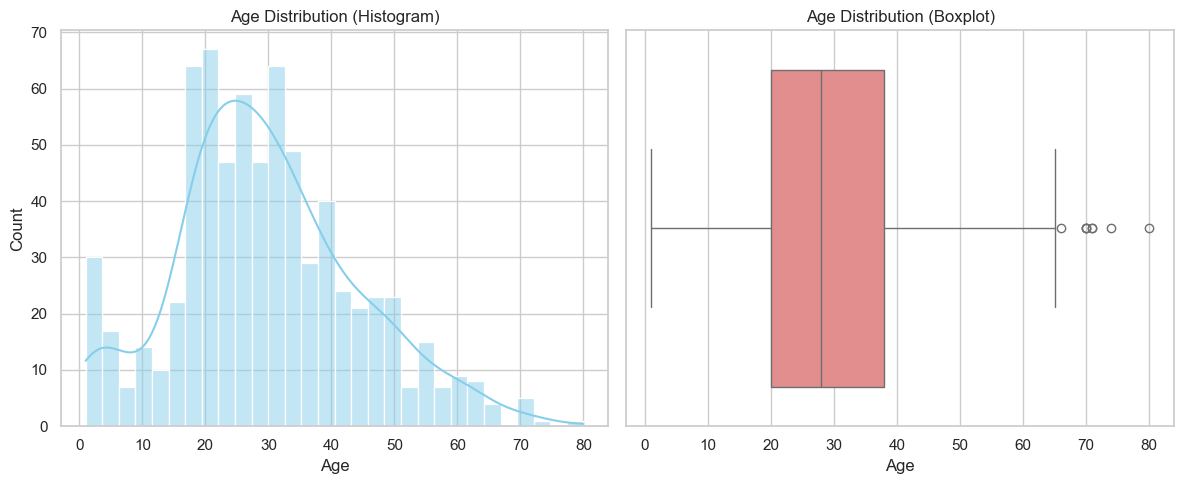

In [26]:
# Histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution (Histogram)')
sns.boxplot(x=df['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Age Distribution (Boxplot)')
plt.tight_layout()
plt.show()

In [35]:
# Outlier detection using IQR
# q1 = df['Age'].quantile(0.25)
# q3 = df['Age'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr
# outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
# print(f'Potential Age outliers (outside {lower_bound:.2f} - {upper_bound:.2f}):')
# print(outliers[['PassengerId', 'Age']])

In [33]:
## 2. Missing Value Analysis
# Count and percentage of missing Age values
missing_count = df['Age'].isna().sum()
missing_pct = missing_count / len(df) * 100
print(f'Missing Age values: {missing_count} ({missing_pct:.2f}%)')


Missing Age values: 177 (19.87%)


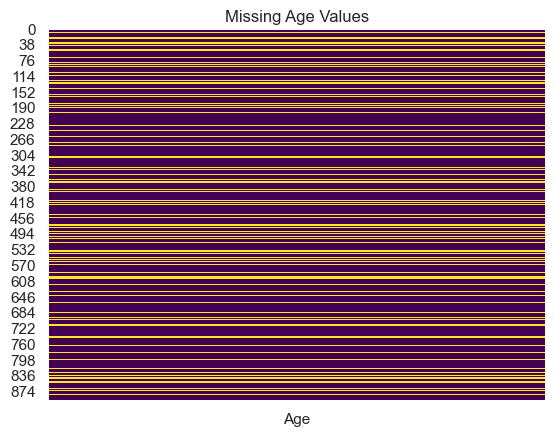

In [37]:
# Visualize missingness
sns.heatmap(df[['Age']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Age Values')
plt.show()

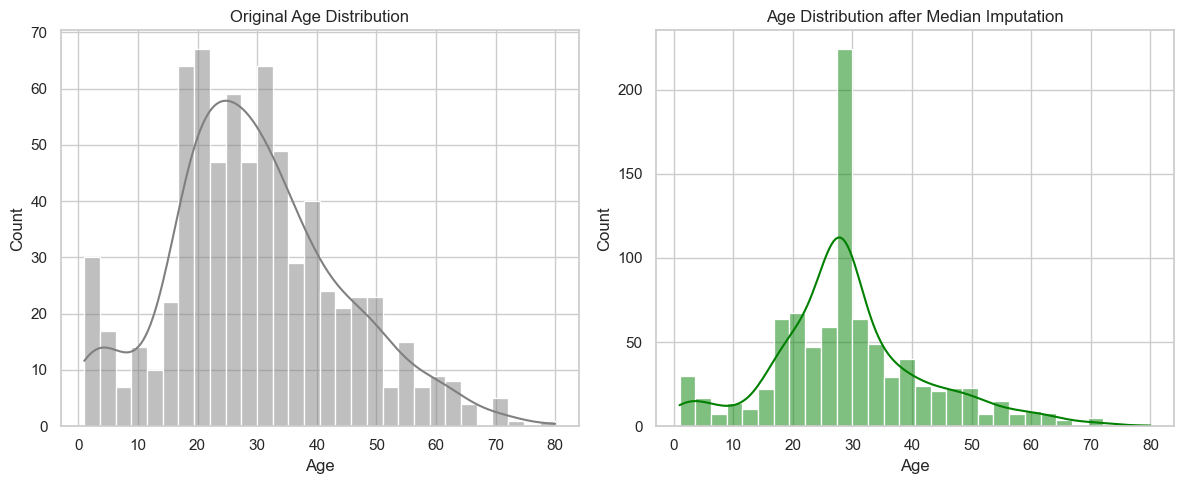

In [47]:

## 3. Imputation Strategies and Visualizations
# Median Imputation
df_median = df.copy()
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

# Visualize the age distribution before/after median imputation together in a seperated plot ( before on the left, after on the right)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='gray')
plt.title('Original Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_median['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution after Median Imputation')
plt.tight_layout()
plt.show()




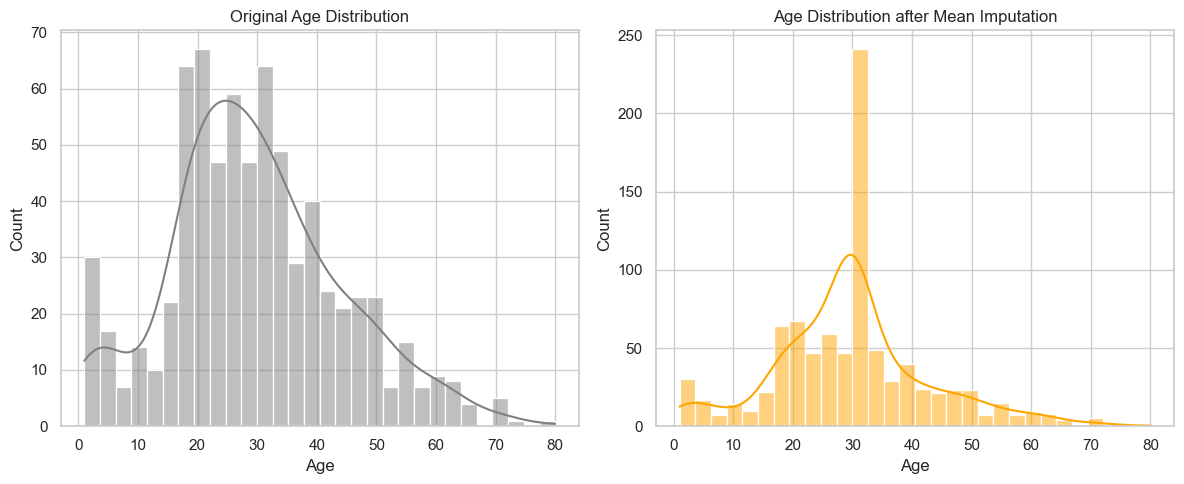

In [48]:
# Mean Imputation

df_mean = df.copy()
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean().round())


# Visualize the age distribution before/after mean imputation together in a seperated plot ( before on the left, after on the right)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='gray')
plt.title('Original Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_mean['Age'], bins=30, kde=True, color='orange')
plt.title('Age Distribution after Mean Imputation')
plt.tight_layout()
plt.show()




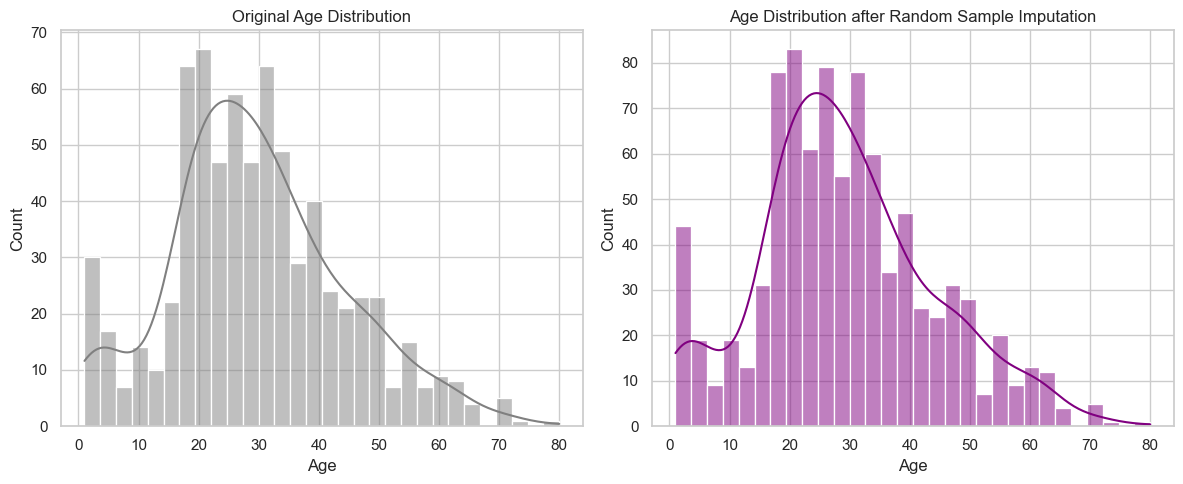

In [49]:
# Random Sample Imputation
df_random = df.copy()
age_non_missing = df_random['Age'].dropna()
df_random.loc[df_random['Age'].isna(), 'Age'] = np.random.choice(age_non_missing, size=df_random['Age'].isna().sum(), replace=True)

# Visualize the age distribution before/after random sample imputation together in a seperated plot ( before on the left, after on the right)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='gray')
plt.title('Original Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_random['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution after Random Sample Imputation')
plt.tight_layout()
plt.show()



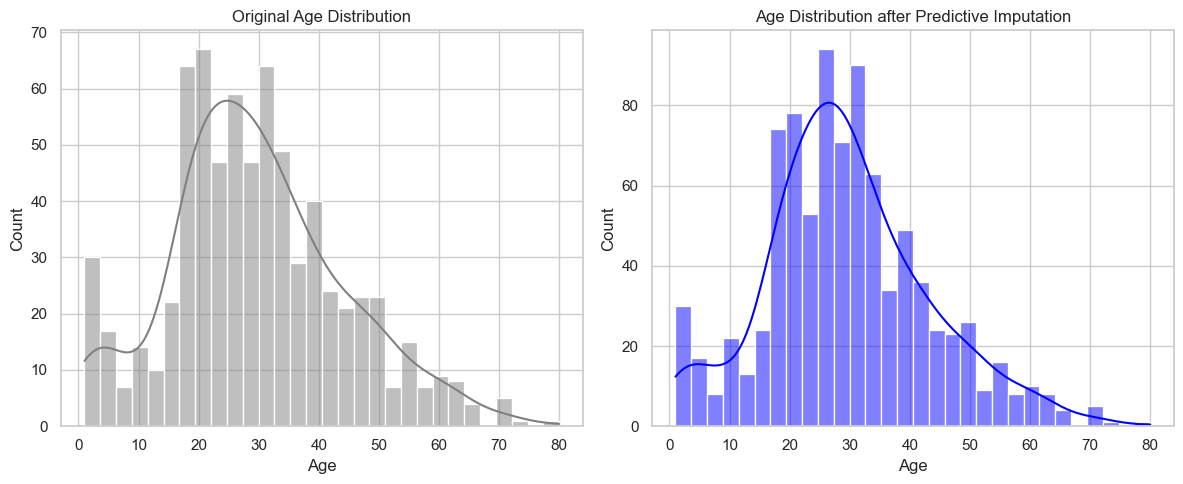

In [56]:

## 4. Predictive Imputation (Example with RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

# Prepare features for prediction
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
df_pred = df.copy()
df_pred['Sex'] = df_pred['Sex'].map({'male': 0, 'female': 1})
X = df_pred.loc[df_pred['Age'].notna(), features]
y = df_pred.loc[df_pred['Age'].notna(), 'Age']
X_missing = df_pred.loc[df_pred['Age'].isna(), features]

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict missing ages
predicted_ages = rf.predict(X_missing)
df_pred.loc[df_pred['Age'].isna(), 'Age'] = pd.Series(np.round(predicted_ages), index=df_pred.loc[df_pred['Age'].isna()].index).astype('Int64')

# Visualize the age distribution before/after predictive imputation together in a seperated plot ( before on the left, after on the right)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='gray')
plt.title('Original Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_pred['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution after Predictive Imputation')
plt.tight_layout()
plt.show()






In [58]:
df_pred.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.618406,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.67086,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.0,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.0,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,37.0,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.0,8.000000,6.000000,512.329200


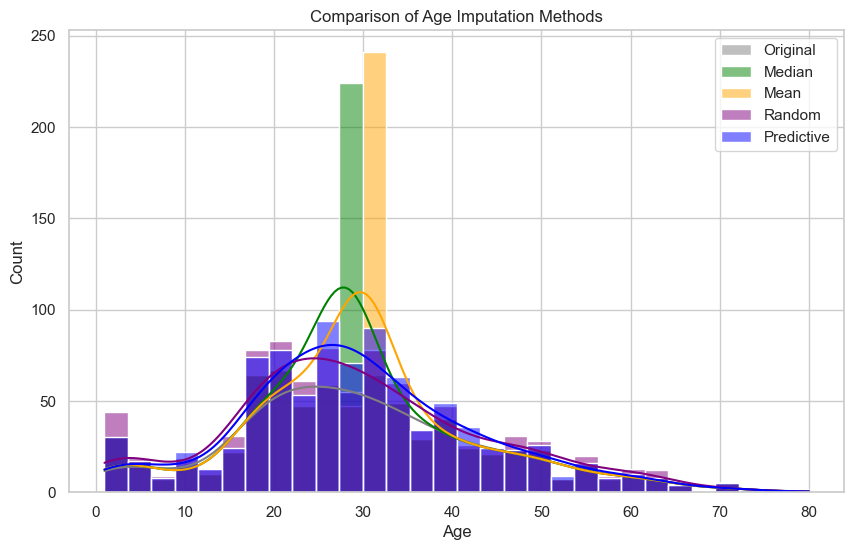

In [57]:
## 5. Comparison of Imputation Approaches
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='gray', label='Original', alpha=0.5)
sns.histplot(df_median['Age'], bins=30, kde=True, color='green', label='Median', alpha=0.5)
sns.histplot(df_mean['Age'], bins=30, kde=True, color='orange', label='Mean', alpha=0.5)
sns.histplot(df_random['Age'], bins=30, kde=True, color='purple', label='Random', alpha=0.5)
sns.histplot(df_pred['Age'], bins=30, kde=True, color='blue', label='Predictive', alpha=0.5)
plt.legend()
plt.title('Comparison of Age Imputation Methods')
plt.show()